<a href="https://colab.research.google.com/github/cloudsucker/image_processing/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%A1%D0%B6%D0%B0%D1%82%D0%B8%D0%B5_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B8%CC%86%2C_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D1%83%D1%8F_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%BC_%D0%9A_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Проектная работа №2**

## **Подготовка к работе**

### Импорты

In [ ]:
import os
import cv2
import time
import imutils
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab.patches import cv2_imshow

### Скачиваем изображение

In [ ]:
!wget -q https://i.pinimg.com/474x/77/fa/ea/77faea5f63389b79e16365932ebc8d8f.jpg -O meme.jpg

### Открываем изображение

In [ ]:
image_filename = "meme.jpg"

image = cv2.imread(image_filename)
print("Image's shape: ", image.shape)

Image's shape:  (420, 418, 3)


## **Выполнение заданий**

### Задание 1

Сжать исходное изображение используя метод K-means, встроенный в библиотеку Scikit-learn при следующих вариантах количества цветов: 2, 3, 4, 8, 16, 32, 64, 128, 256. Сохранить получившиеся изображения в отдельную папку (Scikit Compressor) и продемонстрировать их в отчёте.

In [ ]:
os.makedirs('Scikit Compressor', exist_ok=True)

Изображение с 2 цветами сохранено как Scikit Compressor/compressed_2.jpg


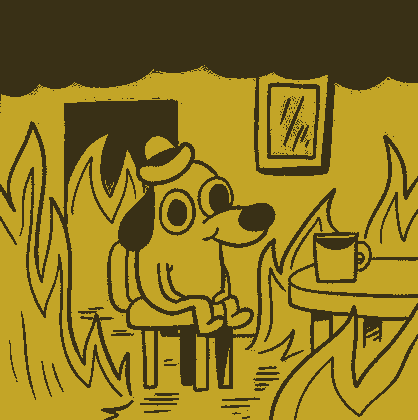

Изображение с 3 цветами сохранено как Scikit Compressor/compressed_3.jpg


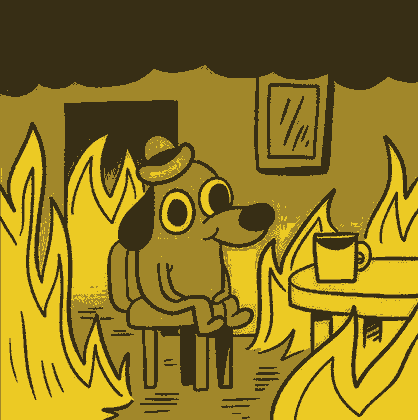

Изображение с 4 цветами сохранено как Scikit Compressor/compressed_4.jpg


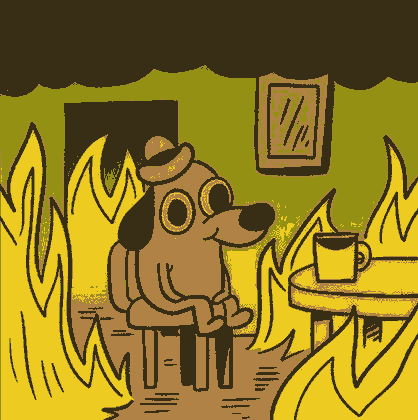

Изображение с 8 цветами сохранено как Scikit Compressor/compressed_8.jpg


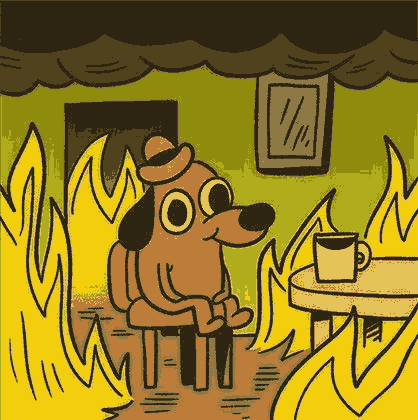

Изображение с 16 цветами сохранено как Scikit Compressor/compressed_16.jpg


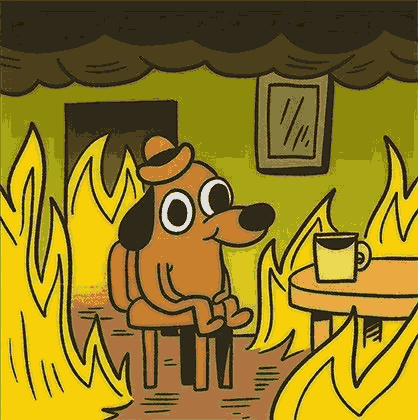

Изображение с 32 цветами сохранено как Scikit Compressor/compressed_32.jpg


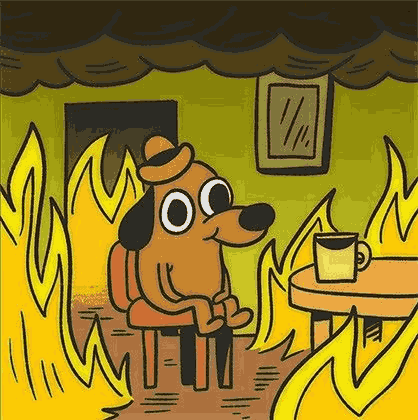

Изображение с 64 цветами сохранено как Scikit Compressor/compressed_64.jpg


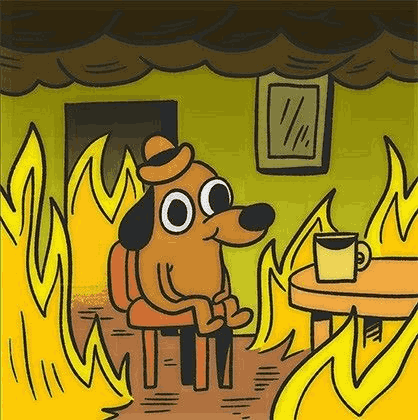

Изображение с 128 цветами сохранено как Scikit Compressor/compressed_128.jpg


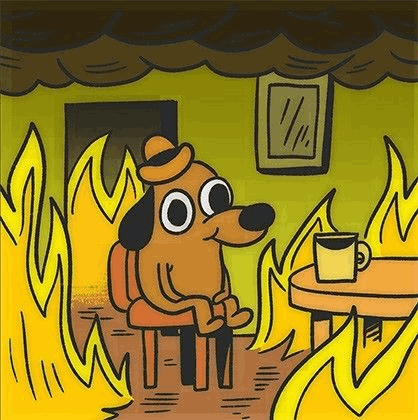

Изображение с 256 цветами сохранено как Scikit Compressor/compressed_256.jpg


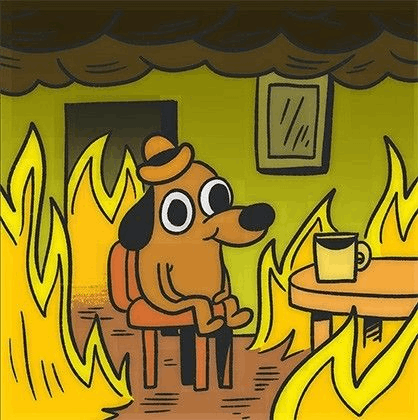

In [ ]:
def compress_image_kmeans(image_filename: str, colors_count: int):
    image = cv2.imread(image_filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_shape = image.shape

    img_r = (image / 255.0).reshape(-1, 3)

    kmeans = KMeans(n_clusters=colors_count, random_state=0)
    kmeans.fit(img_r)

    compressed_img = kmeans.cluster_centers_[kmeans.labels_]
    compressed_img = (compressed_img.reshape(original_shape) * 255).astype(np.uint8)

    return compressed_img


# Тест:
image_filename = 'meme.jpg'
color_options = [2, 3, 4, 8, 16, 32, 64, 128, 256]

for colors_count in color_options:
    compressed_img = compress_image_kmeans(image_filename, colors_count)

    output_path = f'Scikit Compressor/compressed_{colors_count}.jpg'
    Image.fromarray(compressed_img).save(output_path)

    print(f"Изображение с {colors_count} цветами сохранено как {output_path}")
    cv2_imshow(cv2.cvtColor(compressed_img, cv2.COLOR_RGB2BGR))

### Задание 2

Используя алгоритм, дающий возможность вручную выбрать количество итераций, подобрать оптимальное количество итераций по скорости выполнения и качеству сжатого изображения. После этого также следует произвести сжатие изображения с указанными выше количествами цветов. Сохранить получившиеся изображения в отдельную папку (K-means Compressor) и продемонстрировать их в отчёте.

In [ ]:
os.makedirs('K-means Compressor', exist_ok=True)

Изображение с 2 цветами и 10 итерациями сохранено как K-means Compressor/custom_compressed_2.jpg


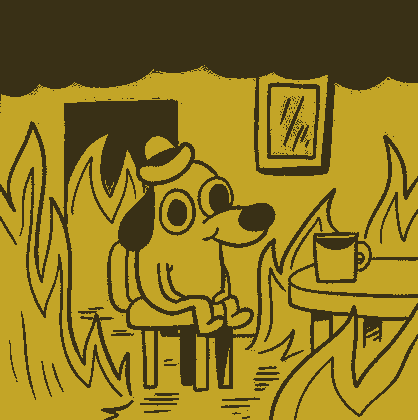

Изображение с 3 цветами и 10 итерациями сохранено как K-means Compressor/custom_compressed_3.jpg


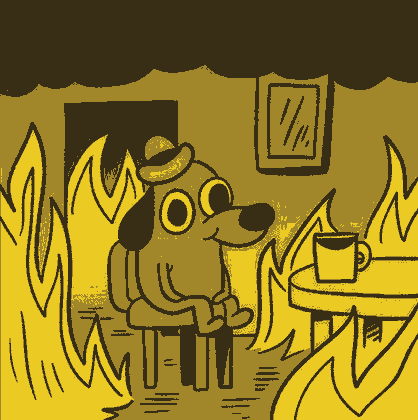

Изображение с 4 цветами и 10 итерациями сохранено как K-means Compressor/custom_compressed_4.jpg


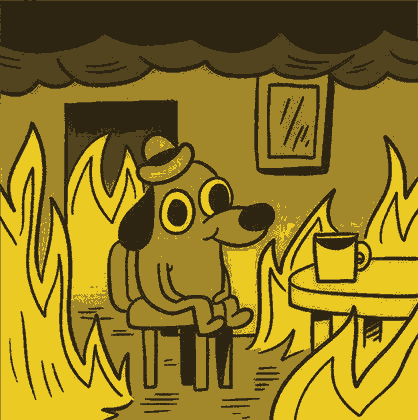

Изображение с 8 цветами и 10 итерациями сохранено как K-means Compressor/custom_compressed_8.jpg


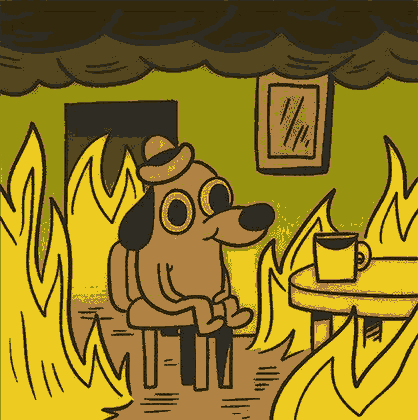

Изображение с 16 цветами и 10 итерациями сохранено как K-means Compressor/custom_compressed_16.jpg


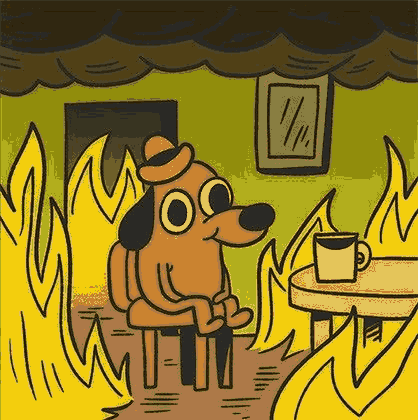

Изображение с 32 цветами и 10 итерациями сохранено как K-means Compressor/custom_compressed_32.jpg


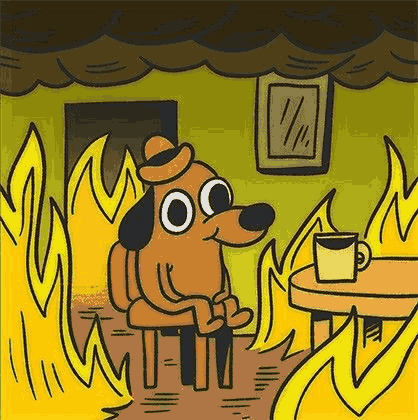

Изображение с 64 цветами и 10 итерациями сохранено как K-means Compressor/custom_compressed_64.jpg


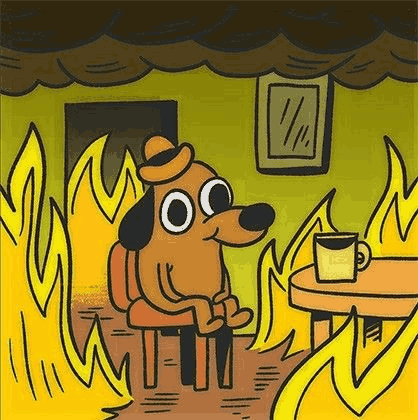

<ipython-input-8-0cf9274c707d>:9: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([image[labels == k].mean(axis=0) for k in range(K)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Изображение с 128 цветами и 10 итерациями сохранено как K-means Compressor/custom_compressed_128.jpg


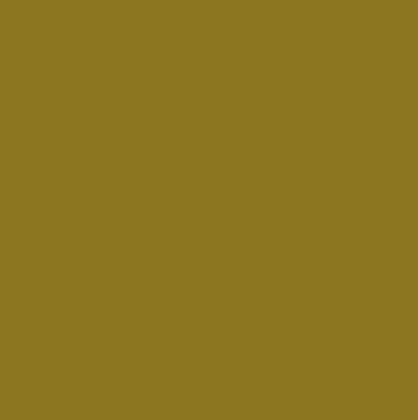

Изображение с 256 цветами и 10 итерациями сохранено как K-means Compressor/custom_compressed_256.jpg


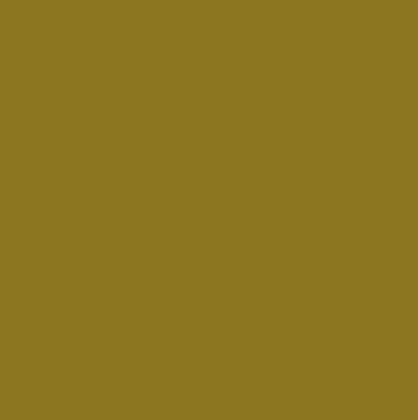

In [ ]:
def kmeans_custom(image: np.ndarray, K: int, max_iters: int):
    N, D = image.shape
    centroids = image[np.random.choice(N, K, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(image[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([image[labels == k].mean(axis=0) for k in range(K)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

def compress_image_custom_kmeans(image_filename: str, K: int, max_iters: int):
    image = cv2.imread(image_filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    original_shape = image.shape
    img_r = (image / 255.0).reshape(-1, 3)

    t1 = time.time()
    centroids, labels = kmeans_custom(img_r, K, max_iters)
    t2 = time.time() - t1

    compressed_img = centroids[labels].reshape(original_shape) * 255
    return compressed_img.astype(np.uint8), t2


# Тест:
image_filename = 'meme.jpg'
colors_counts = [2, 3, 4, 8, 16, 32, 64, 128, 256]
iters_count = 10

for colors_count in colors_counts:
    compressed_img, duration = compress_image_custom_kmeans(image_filename, colors_count, iters_count)
    output_path = f'K-means Compressor/custom_compressed_{colors_count}.jpg'
    Image.fromarray(compressed_img).save(output_path)

    print(f"Изображение с {colors_count} цветами и {iters_count} итерациями сохранено как {output_path}")
    cv2_imshow(cv2.cvtColor(compressed_img, cv2.COLOR_RGB2BGR))


### Задание 3

Составить сравнительную таблицу со следующими данными: количество цветов, вес сжатого изображения по алгоритму из п.1, время выполнения программы для сжатия изображения по алгоритму из п.1, вес сжатого изображения по алгоритму из п.2., время выполнения программы для сжатия изображения по алгоритму из п.2

In [ ]:
def compress_image_kmeans(image_filename: str, colors_count: int):
    image = cv2.imread(image_filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    original_shape = image.shape
    img_r = (image / 255.0).reshape(-1, 3)

    t1 = time.time()
    kmeans = KMeans(n_clusters=colors_count, random_state=0)
    kmeans.fit(img_r)
    t2 = time.time() - t1

    compressed_img = kmeans.cluster_centers_[kmeans.labels_]
    compressed_img = (compressed_img.reshape(original_shape) * 255).astype(np.uint8)

    return compressed_img, t2

def kmeans_custom(image: np.ndarray, K: int, iters_count: int):
    N, D = image.shape
    centroids = image[np.random.choice(N, K, replace=False)]

    for _ in range(iters_count):
        distances = np.linalg.norm(image[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([image[labels == k].mean(axis=0) for k in range(K)])

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

def compress_image_custom_kmeans(image_filename: str, K: int, iters_count: int):
    image = cv2.imread(image_filename)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    original_shape = image.shape
    img_r = (image / 255.0).reshape(-1, 3)

    t1 = time.time()
    centroids, labels = kmeans_custom(img_r, K, iters_count)
    t2 = time.time() - t1

    compressed_img = centroids[labels].reshape(original_shape) * 255

    return compressed_img.astype(np.uint8), t2


# Тест:
image_filename = 'meme.jpg'
colors_counts = [2, 3, 4, 8, 16, 32, 64, 128, 256]
results = []

for colors_count in colors_counts:
    compressed_img_sklearn, t2_sklearn = compress_image_kmeans(image_filename, colors_count)
    output_path_sklearn = f'Scikit Compressor/compressed_{colors_count}.jpg'
    Image.fromarray(compressed_img_sklearn).save(output_path_sklearn)
    size_sklearn = os.path.getsize(output_path_sklearn)

    compressed_img_custom, t2_custom = compress_image_custom_kmeans(image_filename, colors_count, iters_count=10)
    output_path_custom = f'K-means Compressor/custom_compressed_{colors_count}.jpg'
    Image.fromarray(compressed_img_custom).save(output_path_custom)
    size_custom = os.path.getsize(output_path_custom)

    results.append({
        'Colors (k)': colors_count,
        'Scikit Size (bytes)': size_sklearn,
        'Scikit Time (s)': t2_sklearn,
        'Custom Size (bytes)': size_custom,
        'Custom Time (s)': t2_custom
    })

df = pd.DataFrame(results)
df

<ipython-input-5-75191deb19ef>:25: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([image[labels == k].mean(axis=0) for k in range(K)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-5-75191deb19ef>:25: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([image[labels == k].mean(axis=0) for k in range(K)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


,Colors (k),Scikit Size (bytes),Scikit Time (s),Custom Size (bytes),Custom Time (s)
0,2,36116,0.071006,36093,0.263389
1,3,36222,0.084910,36248,0.347294
2,4,36264,0.095283,37880,0.464428
3,8,38208,0.184251,37951,0.858750
4,16,39094,0.303414,39743,2.330349
5,32,39887,1.113538,39992,3.520881
6,64,40761,1.718319,40849,7.118772
7,128,41185,5.259561,3544,13.279538
8,256,41759,11.393022,3544,33.496709


### Задание 4

Подобрать оптимальное количество цветов и итераций для сжатия изображения без наглядного ухудшения качества изображения. Привести пример на пяти разных изображениях.


In [ ]:
os.makedirs('images_to_test', exist_ok=True)

In [ ]:
!wget -q https://cdn.tripster.ru/thumbs2/d610bec2-5ec2-11ed-b82c-261d4dea6cf7.1080x810.jpeg -O images_to_test/1.jpeg
!wget -q https://files.pravda-nn.ru/2022/08/piramidy.jpg -O images_to_test/2.jpg
!wget -q https://img.freepik.com/free-photo/new-york-streets-full-trash_23-2150868170.jpg -O images_to_test/3.jpg
!wget -q https://cdn-s-static.arzamas.academy/storage/post/490/preview_square_preview_picture-0f3253b6-a7ed-472e-9dbb-0e0d9f640e55.jpg -O images_to_test/4.jpg
!wget -q https://s0.rbk.ru/v6_top_pics/media/img/8/03/347244456473038.jpeg -O images_to_test/5.jpeg

<ipython-input-5-75191deb19ef>:25: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([image[labels == k].mean(axis=0) for k in range(K)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-5-75191deb19ef>:25: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([image[labels == k].mean(axis=0) for k in range(K)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-5-75191deb19ef>:25: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([image[labels == k].mean(axis=0) for k in range(K)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
<ipython-input-5-75191deb19ef>:25: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([image[labels

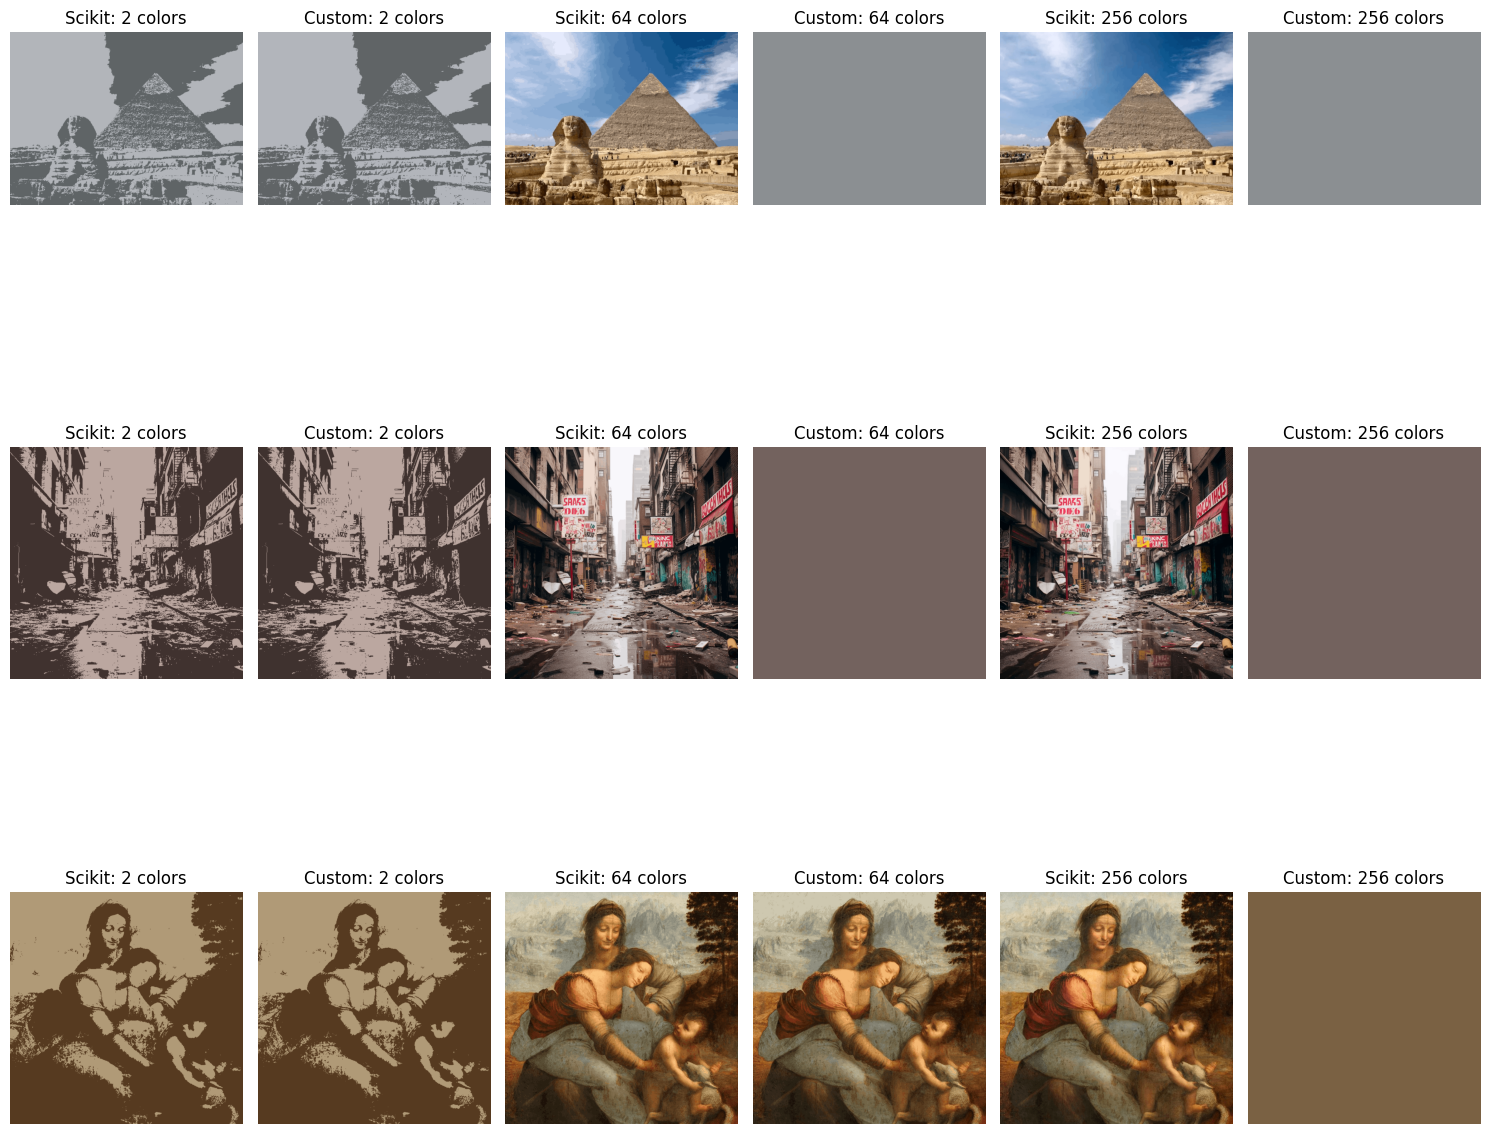

In [ ]:
images_path = 'images_to_test'
image_filenames = ['2.jpg', '3.jpg', '4.jpg']

colors_counts = [2, 64, 256]
iters_counts = [5, 10, 15]

fig, axes = plt.subplots(len(image_filenames), len(colors_counts) * 2, figsize=(15, 15))

for idx, image_filename in enumerate(image_filenames):
    full_image_path = f'{images_path}/{image_filename}'
    for j, colors_count in enumerate(colors_counts):
        compressed_img_sklearn, _ = compress_image_kmeans(full_image_path, colors_count)
        axes[idx, j * 2].imshow(compressed_img_sklearn)
        axes[idx, j * 2].set_title(f'Scikit: {colors_count} colors')
        axes[idx, j * 2].axis('off')

        compressed_img_custom, _ = compress_image_custom_kmeans(full_image_path, colors_count, iters_count=10)
        axes[idx, j * 2 + 1].imshow(compressed_img_custom)
        axes[idx, j * 2 + 1].set_title(f'Custom: {colors_count} colors')
        axes[idx, j * 2 + 1].axis('off')

plt.tight_layout()
plt.show()
